<a href="https://colab.research.google.com/github/Aqsa0308/Projects/blob/main/IBM_Predicting_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as xps
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
!pip install pycaret
from pycaret.classification import*

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Checking null values in dataset #
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
Gender_count = df['Gender'].value_counts()
Gender_count

Gender
Male      882
Female    588
Name: count, dtype: int64

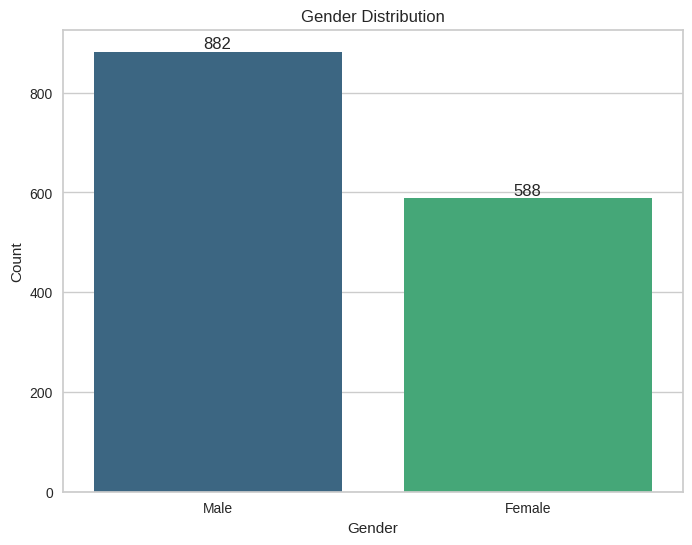

In [9]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=Gender_count.index, y=Gender_count.values, palette='viridis')

# Add titles and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add labels to each bar
for index, value in enumerate(Gender_count.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [10]:
# Checking value count of Attrition#
Attrition_count = df['Attrition'].value_counts()
Attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

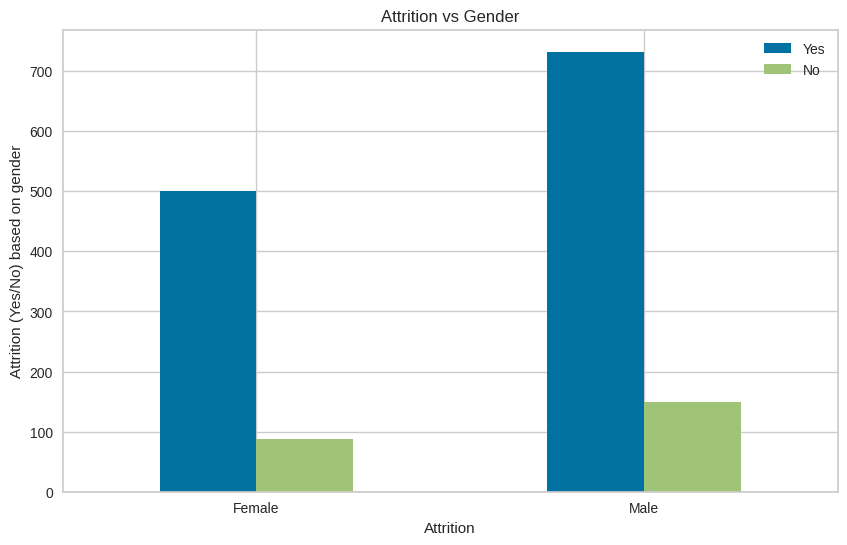

In [11]:
#Create a plot for crosstab

pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("Attrition (Yes/No) based on gender")
plt.legend(["Yes", "No"])
plt.xticks(rotation=0)
# Display the plot
plt.show()

In [12]:
# Assuming df is your DataFrame
value_counts = [
    'Age', 'BusinessTravel', 'Department',
    'DistanceFromHome', 'Education', 'EducationField',
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
    'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
    'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create a dictionary to store value counts for each column
value_counts_dict = {col: df[col].value_counts() for col in value_counts}

# Print the value counts for each column
for col, counts in value_counts_dict.items():
    print(f"Value counts for {col}:\n{counts}\n")

Value counts for Age:
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for DistanceFromHome:
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     2

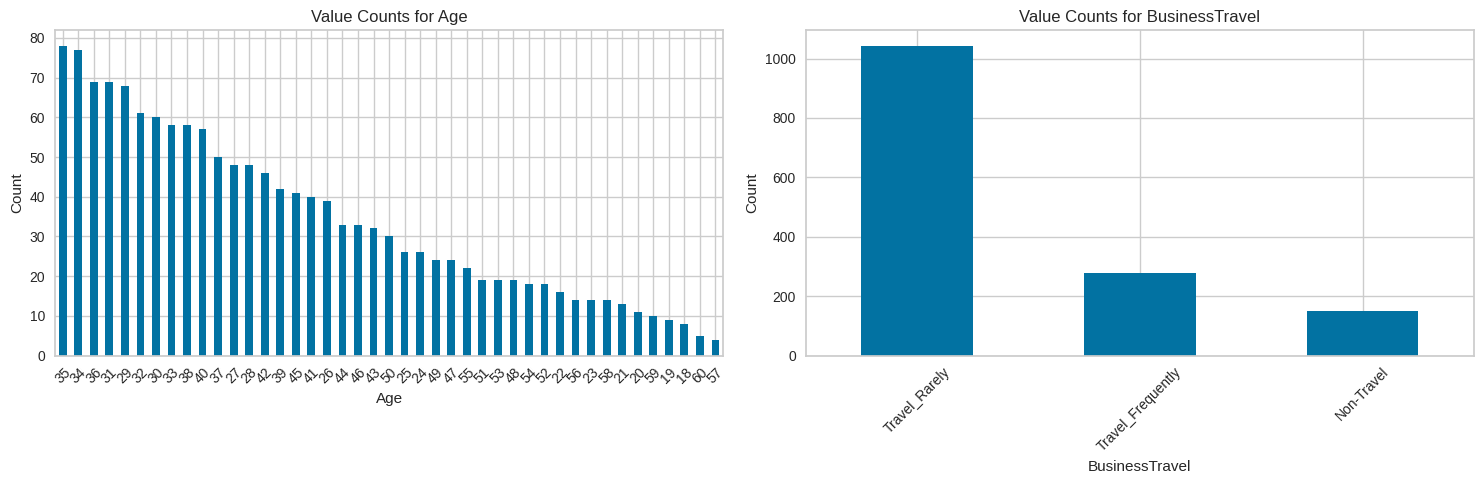

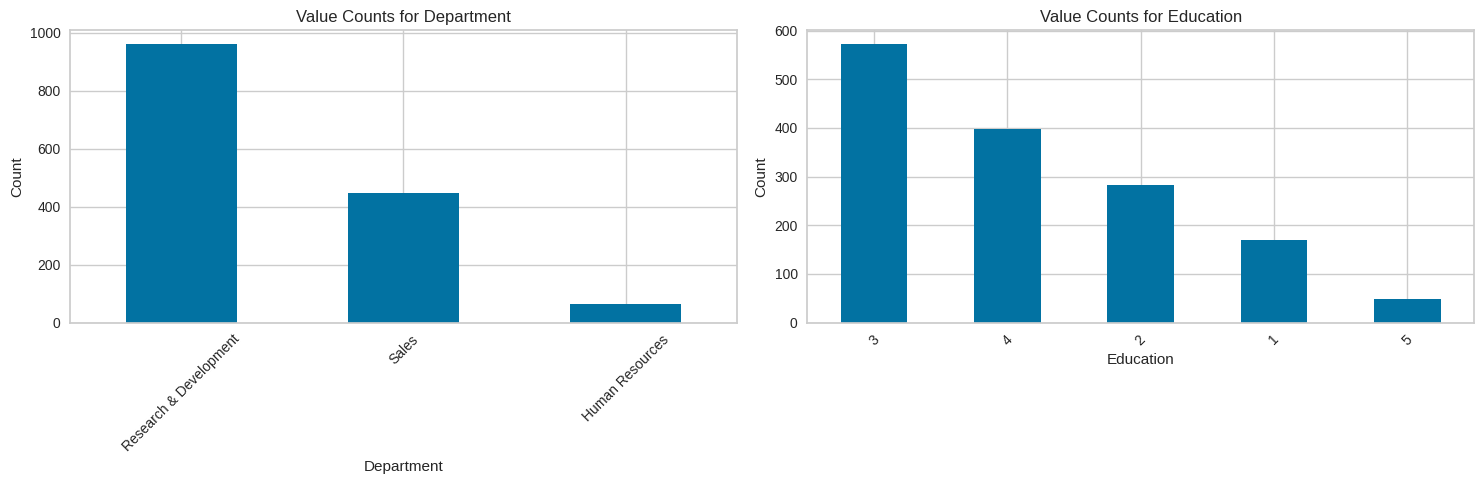

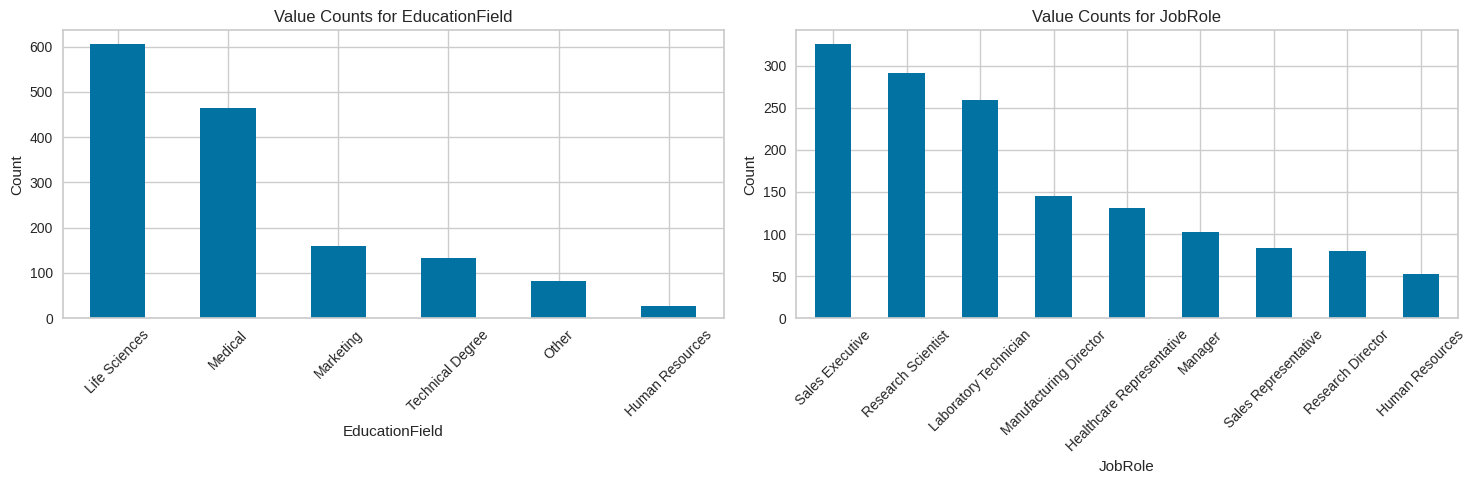

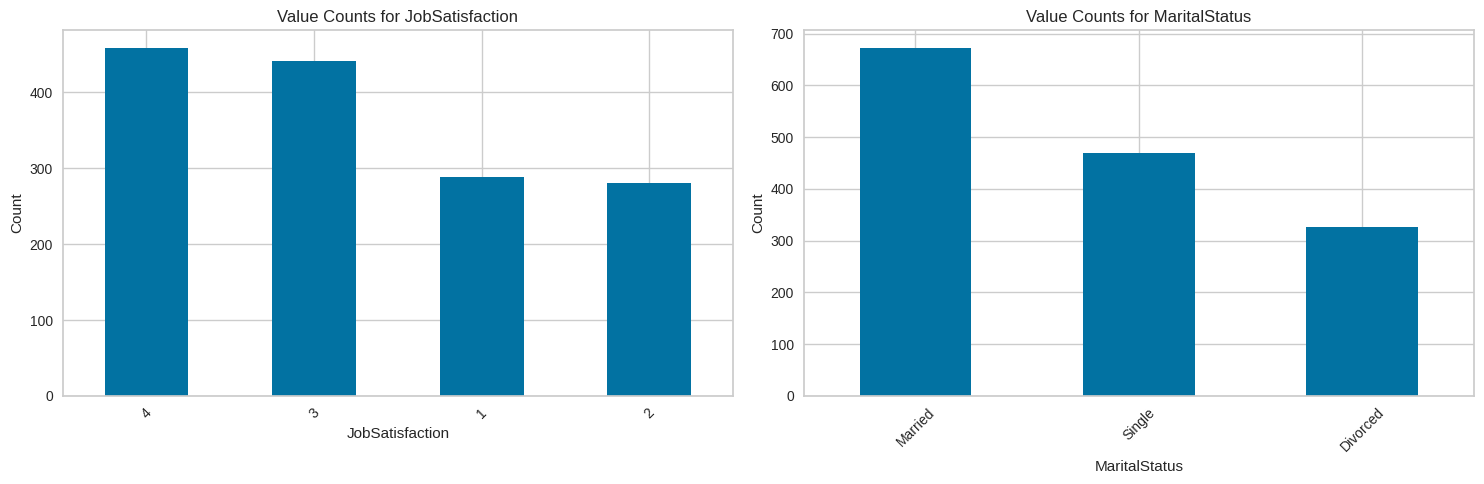

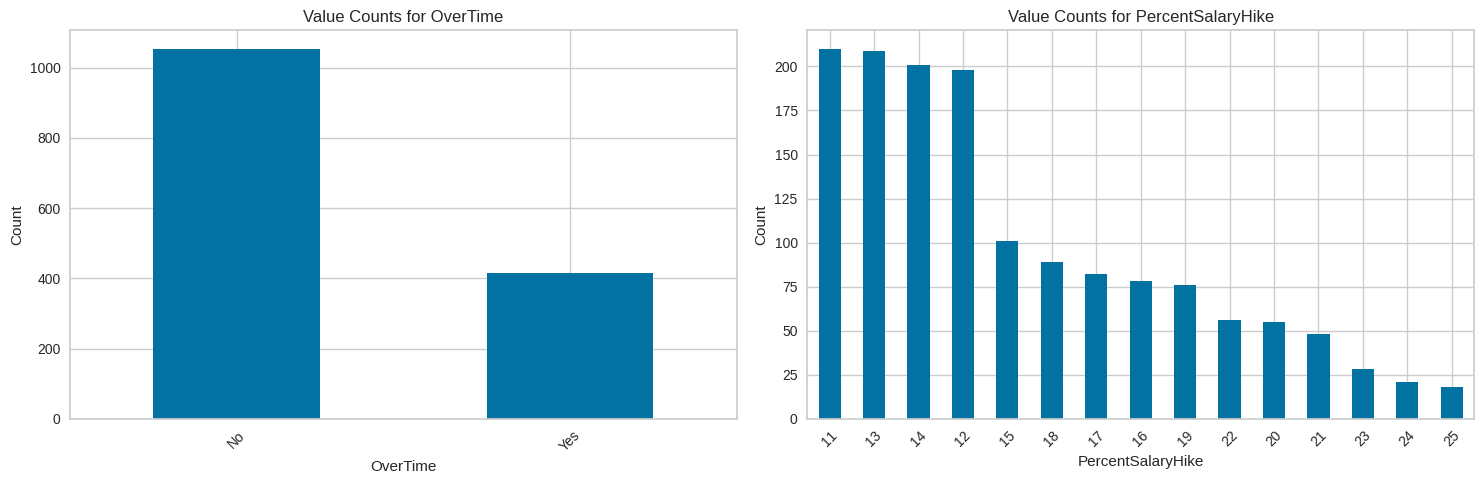

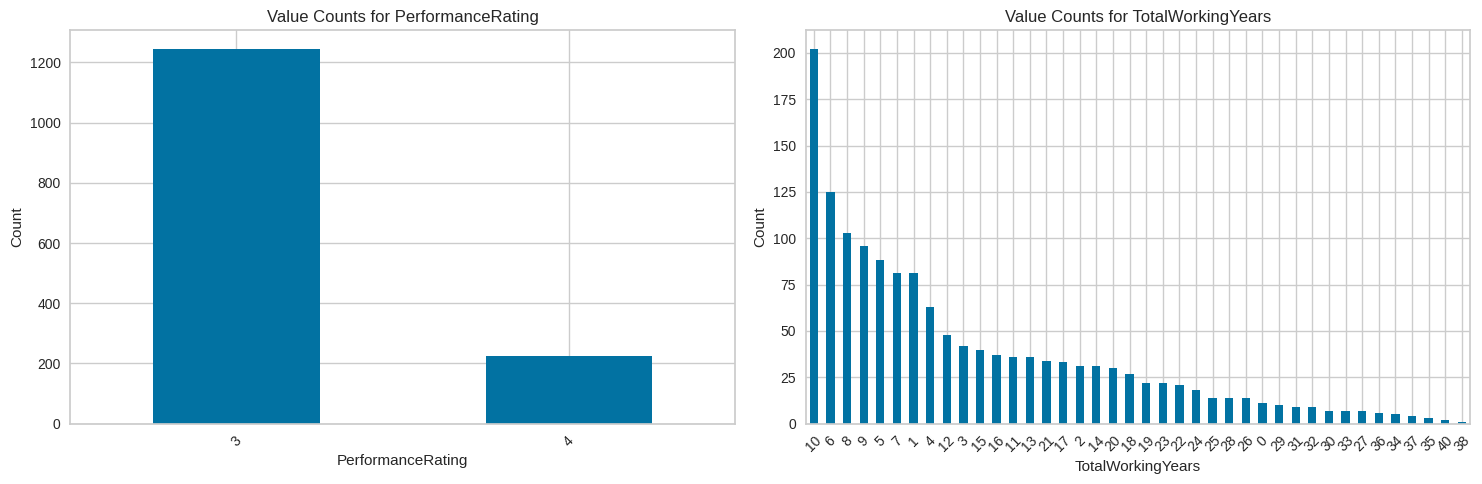

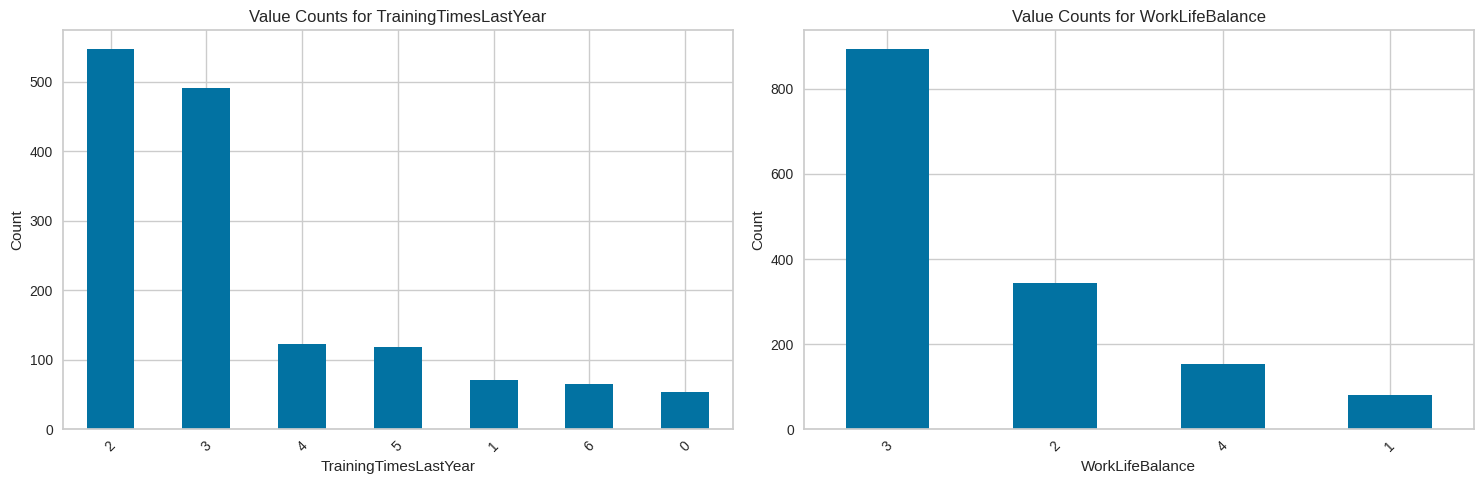

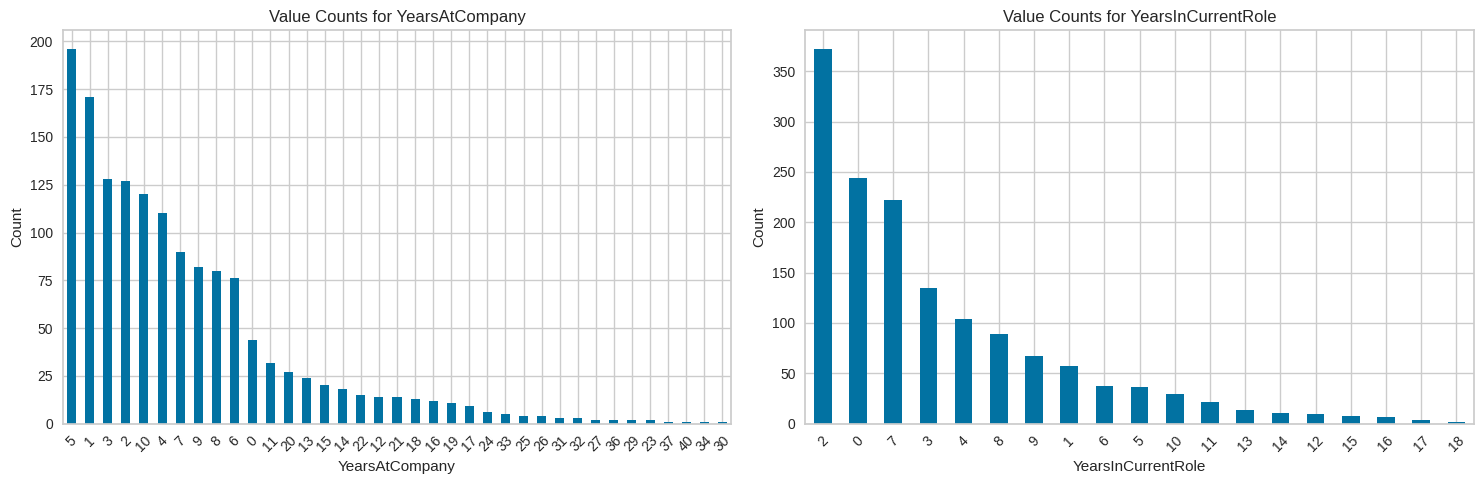

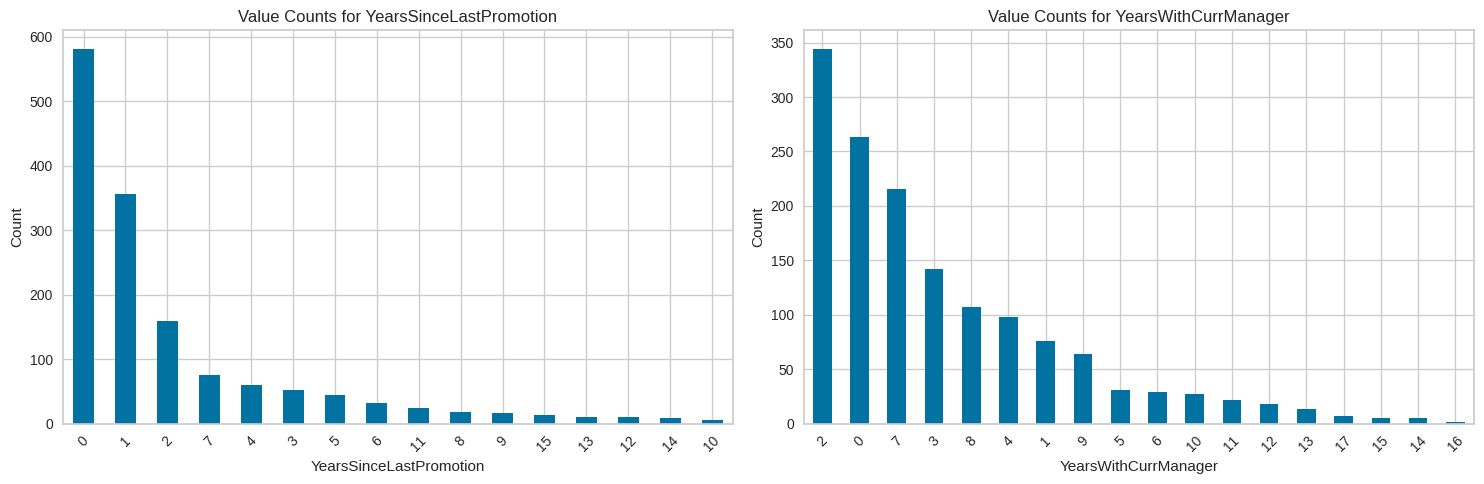

In [13]:
# Assuming df is your DataFrame
value_counts = [
    'Age', 'BusinessTravel', 'Department','Education', 'EducationField','JobRole', 'JobSatisfaction','MaritalStatus','OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create a dictionary to store value counts for each column
value_counts_dict = {col: df[col].value_counts() for col in value_counts}

# Plot two bar charts side by side for each column
for i in range(0, len(value_counts), 2):
    plt.figure(figsize=(15, 5))

    # Plot first bar chart
    plt.subplot(1, 2, 1)
    col1 = value_counts[i]
    value_counts_dict[col1].plot(kind='bar')
    plt.title(f"Value Counts for {col1}")
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot second bar chart if there is another column
    if i+1 < len(value_counts):
        plt.subplot(1, 2, 2)
        col2 = value_counts[i+1]
        value_counts_dict[col2].plot(kind='bar')
        plt.title(f"Value Counts for {col2}")
        plt.xlabel(col2)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

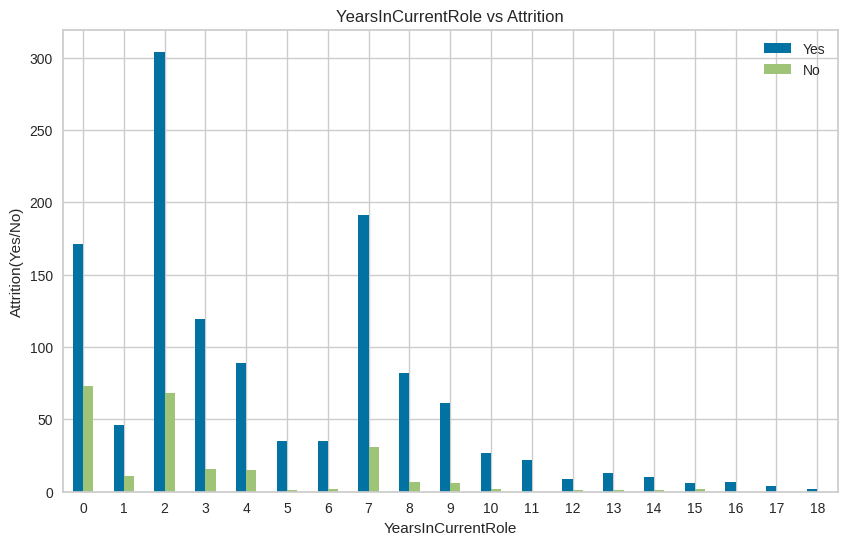

In [14]:
#Create a plot for crosstab

pd.crosstab(df['YearsInCurrentRole'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("YearsInCurrentRole vs Attrition")
plt.xlabel("YearsInCurrentRole")
plt.ylabel("Attrition(Yes/No)")
plt.legend(["Yes", "No"])
plt.xticks(rotation=0)
# Display the plot
plt.show()

In [15]:
# Define the categorical and numerical features
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                      'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [16]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
# Assuming df is your DataFrame and 'Attrition' is your target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(n_estimators=100)
}

# Fit, predict and evaluate each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Print accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    # Print classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Accuracy for logistic_regression: 0.8946
Classification report for logistic_regression:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.64      0.46      0.54        39

    accuracy                           0.89       294
   macro avg       0.78      0.71      0.74       294
weighted avg       0.88      0.89      0.89       294

------------------------------------------------------------
Accuracy for decision_tree: 0.7959
Classification report for decision_tree:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       255
           1       0.18      0.15      0.17        39

    accuracy                           0.80       294
   macro avg       0.53      0.52      0.53       294
weighted avg       0.78      0.80      0.79       294

------------------------------------------------------------
Accuracy for random_forest: 0.8776
Classification report for